In [ ]:
"""
Objectives:
    • Fit a model using binary classification using logistic regression.
    • Identify correlated variables and form a less complex model.
"""

In [16]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
CSV_PATH = r'D:\CourseWork\data-science-python-certification-course\Assignments\07 Supervised Learning - 1\resources\voice.csv'
df = pd.read_csv(CSV_PATH)

In [9]:
# overall stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [10]:
# mapping male => 0 and female => 1

mf_mapping = {"male": 0, "female": 1}
df['label'] = df['label'].map(lambda x: mf_mapping.get(x))
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


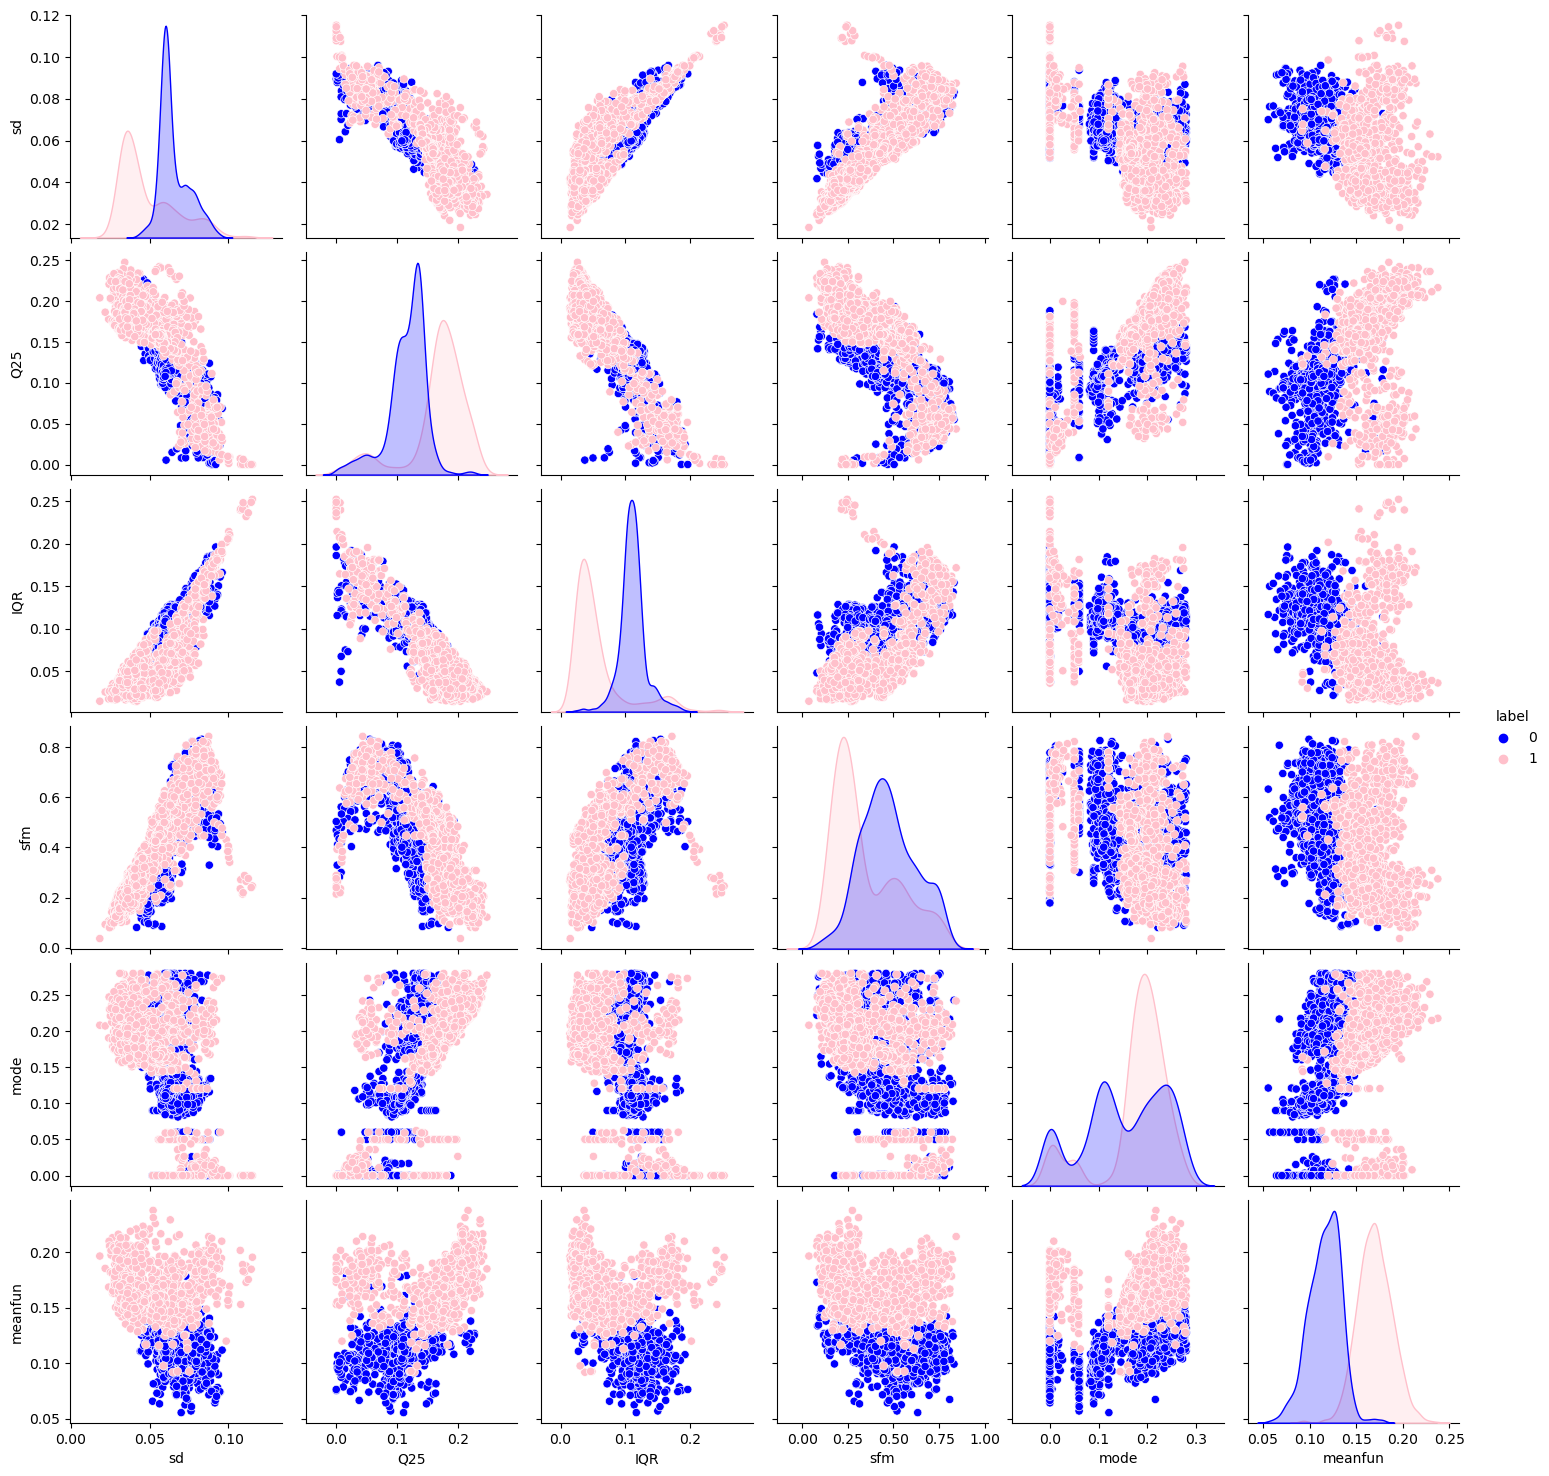

In [11]:
# relevant features identification

relevant_features = ['sd','Q25','IQR','sfm','mode','meanfun']
sns.pairplot(df[relevant_features + ['label']], palette=sns.color_palette(['blue', 'pink']), hue='label')

In [12]:
# by looking at above, most-telling parameter is meanfun (mean fundamental frequency) which obviously exhibited by males is lower than females

x = df[relevant_features]
y = df['label']

In [13]:
# Split the dataset into train-test with 20% of the data kept aside for testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Fit a logistic regression model and measure the accuracy of the test set.
lrm = LogisticRegression()
lrm.fit(x_train, y_train)
predicted_data = lrm.predict(x_test)
metrics.accuracy_score(predicted_data, y_test)

0.9242902208201893

In [ ]:
"""
3. Compute the correlation matrix that describes the dependence between all 
predictors and identifies the highly correlated predictors. Plot the correlation 
matrix using a seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate methods]

4. Based on correlation remove those predictors that are correlated and fit a 
logistic regression model again and compare the accuracy with that of the 
previous model.
[Hint: Identify correlated variable pairs and remove one among them
"""

# Due to features selection on early stage, We got pretty decent accuracy and leave this out due to shortage of time
# #TODO: optimization